In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
from pathlib import Path
import pandas as pd
import csv
import math
import numpy as np

In [120]:
def read_data():
    url1='https://drive.google.com/file/d/17bqqiJZ7JCXPt0EwseFBPZbBIuV7-YcG/view?usp=sharing'
    url1='https://drive.google.com/uc?id=' + url1.split('/')[-2]
    url2='https://drive.google.com/file/d/1kulRVMpepw903zqZAIETRHR3CKCw9hCT/view?usp=sharing'
    url2='https://drive.google.com/uc?id=' + url2.split('/')[-2]

    df1= pd.read_csv(url1)
    df2= pd.read_csv(url2)
    return df1,df2

In [121]:
df1,df2=read_data()
df1.describe()

,value
count,21410.000000
mean,85.968188
std,13.553070
min,2.084721
25%,83.082867
50%,89.251290
75%,93.910748
max,108.510543


In [122]:
df2.describe()

,value
count,22695.000000
mean,85.926498
std,13.746912
min,2.084721
25%,83.080078
50%,89.408246
75%,94.016252
max,108.510543


In [123]:
print(f"df1: {df1.isnull().sum()}")
print(f"df2: {df2.isnull().sum()}")

df1: timestamp       0
value        1285
dtype: int64
df2: timestamp    0
value        0
dtype: int64


In [124]:
df1 = df1.rename(columns={"value": "temp"})

In [125]:
df1['delta_temp']=df1['temp']-df1['temp'].shift(1)
df1

,timestamp,temp,delta_temp
0,02-12-2013 21:15,73.967322,NaN
1,02-12-2013 21:20,74.935882,0.968560
2,02-12-2013 21:25,76.124162,1.188280
3,02-12-2013 21:30,78.140707,2.016546
4,02-12-2013 21:35,79.329836,1.189128
...,...,...,...
22690,19-02-2014 15:05,98.185415,NaN
22691,19-02-2014 15:10,97.804168,-0.381246
22692,19-02-2014 15:15,97.135468,-0.668700
22693,19-02-2014 15:20,98.056852,0.921384


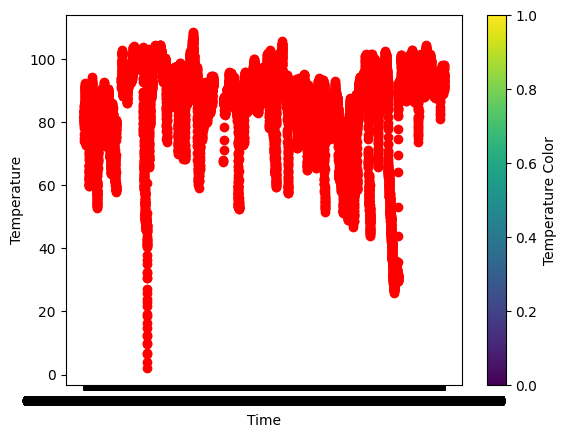

In [70]:
plt.scatter(df1['timestamp'],df1['temp'],color='red')
# plt.scatter(df1['timestamp'],df1['delta_temp'],color='blue')
plt.xlabel('Time')
plt.ylabel('Temperature')
cbar = plt.colorbar()
cbar.set_label('Temperature Color')
plt.show()

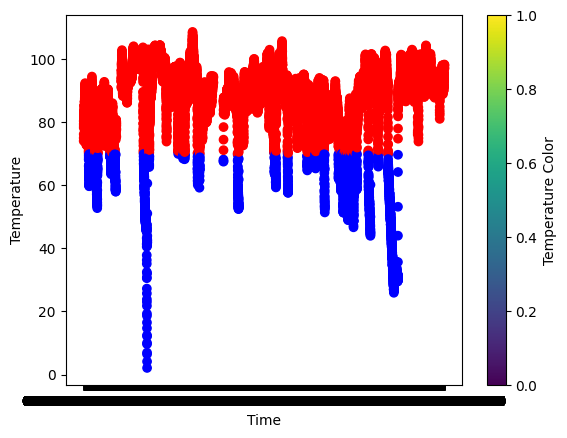

In [73]:
set_colour=['blue' if temp<70.0 else 'red' for temp in df1['temp']]
plt.scatter(df1['timestamp'],df1['temp'],color=set_colour)
plt.xlabel('Time')
plt.ylabel('Temperature')
cbar = plt.colorbar()
cbar.set_label('Temperature Color')
plt.show()

In [126]:
# filling values using univariate imputation
df1['ffill'] = df1['temp'].fillna(method='ffill')
df1['bfill'] = df1['temp'].fillna(method='bfill')
df1['mean'] = df1['temp'].fillna(df1['temp'].mean())

In [127]:
from sklearn.impute import SimpleImputer
strategy = [
    ('Mean Strategy', 'mean'),
    ('Median Strategy', 'median'),
    ('Most Frequent Strategy', 'most_frequent')]
temp_vals = df1['temp'].values.reshape(-1,1)
for strategy_name, method in strategy:
    df1[strategy_name] = (
        SimpleImputer(strategy=method).fit_transform(temp_vals))

In [128]:
interpolation_methods = [
    'linear',
    'quadratic',
    'nearest',
    'cubic'
]
import numpy as np
for methods in interpolation_methods:
    df1[methods] = df1['temp'].interpolate(method=methods)

In [129]:
df1

,timestamp,temp,delta_temp,ffill,bfill,mean,Mean Strategy,Median Strategy,Most Frequent Strategy,linear,quadratic,nearest,cubic
0,02-12-2013 21:15,73.967322,NaN,73.967322,73.967322,73.967322,73.967322,73.967322,73.967322,73.967322,73.967322,73.967322,73.967322
1,02-12-2013 21:20,74.935882,0.968560,74.935882,74.935882,74.935882,74.935882,74.935882,74.935882,74.935882,74.935882,74.935882,74.935882
2,02-12-2013 21:25,76.124162,1.188280,76.124162,76.124162,76.124162,76.124162,76.124162,76.124162,76.124162,76.124162,76.124162,76.124162
3,02-12-2013 21:30,78.140707,2.016546,78.140707,78.140707,78.140707,78.140707,78.140707,78.140707,78.140707,78.140707,78.140707,78.140707
4,02-12-2013 21:35,79.329836,1.189128,79.329836,79.329836,79.329836,79.329836,79.329836,79.329836,79.329836,79.329836,79.329836,79.329836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22690,19-02-2014 15:05,98.185415,NaN,98.185415,98.185415,98.185415,98.185415,98.185415,98.185415,98.185415,98.185415,98.185415,98.185415
22691,19-02-2014 15:10,97.804168,-0.381246,97.804168,97.804168,97.804168,97.804168,97.804168,97.804168,97.804168,97.804168,97.804168,97.804168
22692,19-02-2014 15:15,97.135468,-0.668700,97.135468,97.135468,97.135468,97.135468,97.135468,97.135468,97.135468,97.135468,97.135468,97.135468
22693,19-02-2014 15:20,98.056852,0.921384,98.056852,98.056852,98.056852,98.056852,98.056852,98.056852,98.056852,98.056852,98.056852,98.056852


In [130]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    min_score=10000000000000000
    method=" "
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
        if rmse<min_score:
          min_score=rmse
          method=comp_col
    print(f'Minimum RMSE for {method} which is {min_score}')
    return scores

In [131]:
df2=df2.rename(columns={'value': 'temp'})
rmse_scores=rmse_score(df2,df1,'temp')
rmse_scores

RMSE for delta_temp: 87.02576617592636
RMSE for ffill: 2.4939956524274454
RMSE for bfill: 5.873128567455812
RMSE for mean: 3.961536496226712
RMSE for Mean Strategy: 3.961536496226712
RMSE for Median Strategy: 4.071585793081295
RMSE for Most Frequent Strategy: 20.176855010139285
RMSE for linear: 4.043203597694257
RMSE for quadratic: 11.547623967933907
RMSE for nearest: 4.538509533797259
RMSE for cubic: 12.63060501654674
Minimum RMSE for ffill which is 2.4939956524274454


[87.02576617592636,
 2.4939956524274454,
 5.873128567455812,
 3.961536496226712,
 3.961536496226712,
 4.071585793081295,
 20.176855010139285,
 4.043203597694257,
 11.547623967933907,
 4.538509533797259,
 12.63060501654674]

<Axes: >

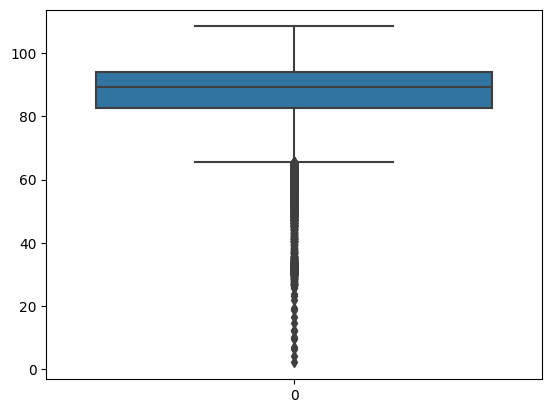

In [132]:
import seaborn as sns
sns.boxplot(df1['ffill'])

<Axes: >

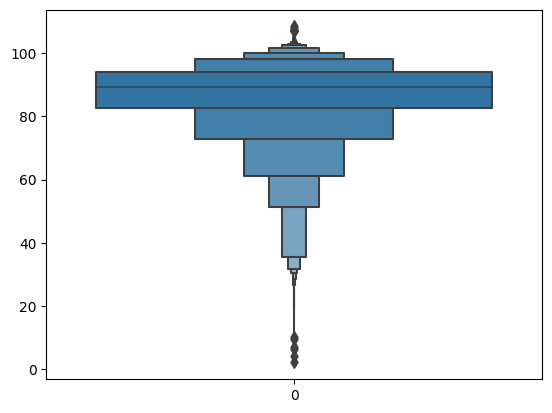

In [133]:
sns.boxenplot(df1['ffill'])

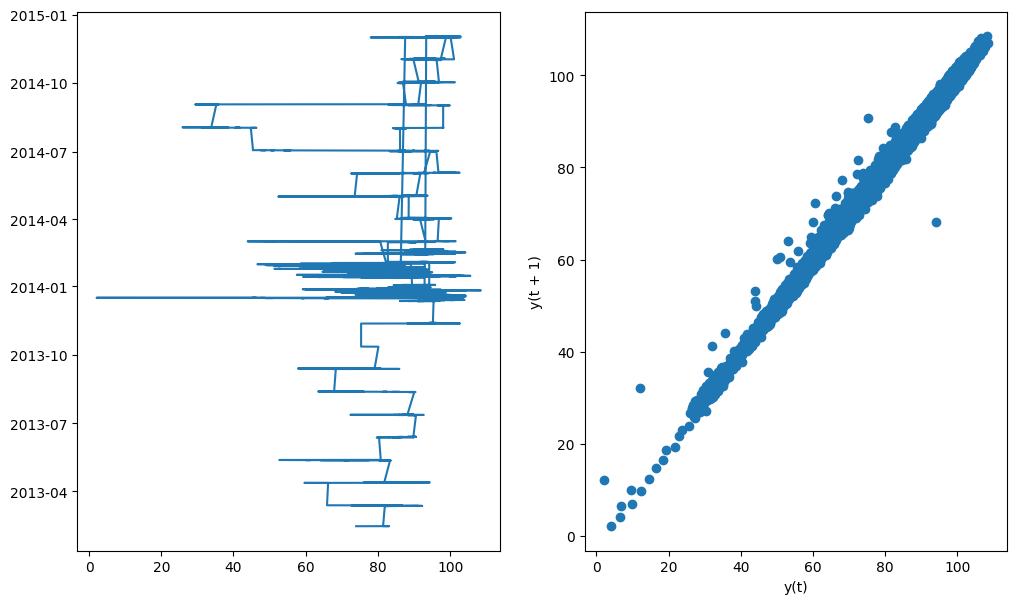

In [134]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1.set_index('timestamp',inplace=True)
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
ax[0].plot(df1['ffill'], df1.index)
pd.plotting.lag_plot(df1['ffill'], lag=1,ax=ax[1])
plt.show()

In [135]:
outliers=df1['ffill']<50
f_outlier=[]
for _ in range(len(df1['ffill'])):
  if outliers[_]:
    f_outlier.append(df1['ffill'][_])
print(f_outlier)

[49.21029401, 48.84738522, 49.74401138, 49.97094575, 49.33884328, 48.78436052, 49.53339906, 49.78162577, 49.62187665, 49.68919324, 48.30739042, 48.82902834, 48.10254852, 49.46442467, 48.33883452, 48.00434093, 48.90008594, 49.56887872, 49.37605213, 48.80167321, 47.80191086, 49.07504767, 49.24019399, 48.20736299, 48.62104883, 49.51150583, 47.52778085, 49.15285659, 48.22976589, 48.76461254, 48.41482013, 48.5520704, 48.61894249, 47.50916129, 48.65187261, 47.07105491, 47.48283583, 47.15190756, 47.97227843, 47.95899435, 46.96989176, 48.74477405, 47.42435797, 46.61640041, 47.59462942, 48.31961709, 47.22434182, 47.90009631, 48.16424514, 47.60611477, 47.14741295, 47.88889085, 47.25605389, 46.88716102, 46.76427792, 46.26625835, 47.21476764, 47.12237735, 47.84390938, 46.28042599, 47.89438575, 45.88065187, 45.93348708, 46.44069985, 45.69180477, 47.54428761, 45.66502197, 45.78300206, 46.93858357, 46.25313734, 47.62256048, 46.27868176, 46.96455654, 47.48451206, 47.34018048, 46.41420425, 47.49389536,

In [136]:
import scipy.stats as stats

In [137]:
df1['z_scores'] = stats.zscore(df1['ffill'])
df1['z_scores'].head()

timestamp
2013-02-12 21:15:00   -0.910091
2013-02-12 21:20:00   -0.837610
2013-02-12 21:25:00   -0.748688
2013-02-12 21:30:00   -0.597784
2013-02-12 21:35:00   -0.508798
Name: z_scores, dtype: float64

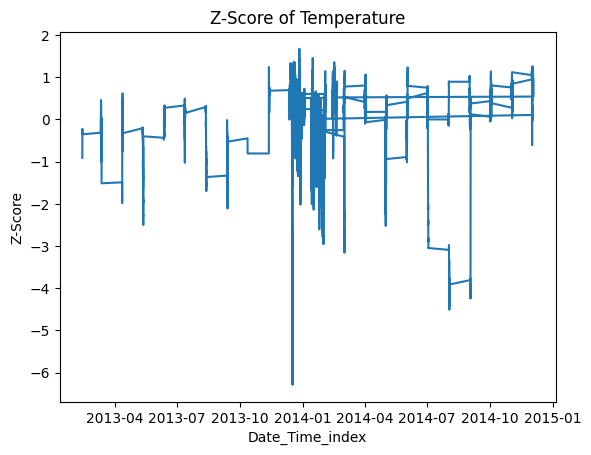

In [138]:
plt.plot(df1.index, df1['z_scores'])
plt.xlabel('Date_Time_index')
plt.ylabel('Z-Score')
plt.title('Z-Score of Temperature')
plt.show()